In [1]:
import sys
import os
import cv2
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import pi, matmul,sqrt,dot,array,zeros,cos,sin,pi,arccos
from torch.utils.data import DataLoader
from func import OR,heatplot,misorientation,classplot,ipfplot,ipfread,negsample
from func2 import create_dataset
from Class import Data,Cluster,Dataset,CNN49a,CNN49b
import torch.nn.functional as F
import matplotlib.patches as patches

In [2]:
# train=create_dataset("data/train/",feature=["Orient","BC","BS"])
# test=create_dataset("data/test/",feature=["Orient","BC","BS"])

# X=create_dataset("data/train/",feature=["Orient","BC","BS","MAD","Error","Bands","Phase"],use_corner=0)
X_=create_dataset("data/test/",feature=["BC","BS","MAD"],use_corner=0)

In [3]:
m1 = torch.load("model/0.892_CNN49b_BC_BS_MAD.pkl")
# m2 = torch.load("model/CNN3_obcbs_0.775")
# m3 = torch.load("model/CNN3_obcbs_0.775")
m1.eval()
# m2.eval()
# cum=0
# for batch_ndx, sample in enumerate(test_loader):
#     X,Y,_= sample
#     output=m1(X)
#     predict = torch.max(output, 1)[1]
#     cum+=np.sum((Y == predict).cpu().numpy())
# print(cum/len(test))


C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.pooling.MaxPool2d' has changed. you can retrieve the original source code by accessing the object's sourc

CNN49b(
  (batchnorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn1): Conv2d(3, 12, kernel_size=(4, 4), stride=(1, 1))
  (cnn2): Conv2d(12, 18, kernel_size=(4, 4), stride=(1, 1))
  (cnn3): Conv2d(18, 24, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=384, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

20200907 (13, 262)
tensor(0)
tensor([[0.6541, 0.3459]], grad_fn=<SoftmaxBackward>)


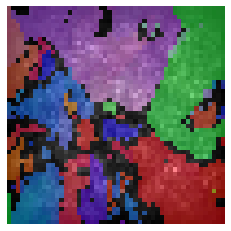

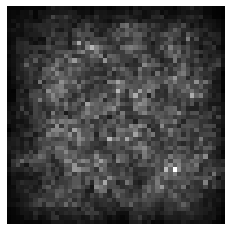

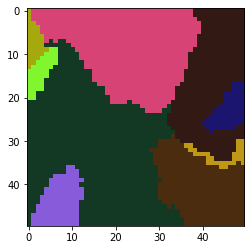

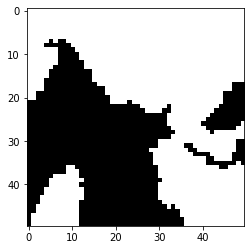

In [5]:
corner=torch.load("data/corner.pkl")
for param in model.parameters():
    param.requires_grad = False
index=10
X=test[index][0].unsqueeze(0)
date,coord=test[index][2]
print(date,coord)
k,l=coord
im=ipfread("data/test/"+date+"/before/")
print(test[index][1])
model.eval()
X.requires_grad_()
scores = model(X)
print(scores)
score_max_index = scores.argmax()
score_max = scores[0,score_max_index]
score_max.backward()
saliency, _ = torch.max(X.grad.data.abs(),dim=1)
plt.imshow(im[k:k+50,l:l+50,6:][...,[2,1,0]].astype("int"))
plt.axis('off')
plt.imshow(saliency[0],cmap="gray",alpha=0.5)
# plt.savefig("output/test%d_cover.png"%(index),dpi=600,bbox_inches='tight', pad_inches=0)
plt.show()
plt.imshow(saliency[0],cmap="gray")
plt.axis('off')
# plt.savefig("output/test%d_sal.png"%(index),dpi=600,bbox_inches='tight', pad_inches=0)
plt.show()
# cv2.imwrite("output/test%d_%d.png"%(index,test[index][1]),(255*test[index][2][:,:,6:]).astype("int"))
class_map,id2clus,ma_id=torch.load("data/test/"+date+"/before/cluster.pkl")
h,w=500,500
ma_map=np.ones([h,w])
for id in ma_id:
    for (i,j) in id2clus[id].pixels:
        ma_map[i,j]=0
classplot(class_map[k:k+50,l:l+50])
plt.imshow(ma_map[k:k+50,l:l+50],cmap="gray")
plt.show()



In [10]:
h=w=499
ks=49
new_map_2=np.zeros([X_.shape[0],h-ks+1,w-ks+1])
for i in range(h-ks+1):
    print(1)
    for j in range(w-ks+1):
        pred=m1(X_[:,:,i:i+ks,j:j+ks])
#         val,ind=torch.max(pred,axis=1)
        for k in range(pred.shape[0]):
            new_map_2[k,i,j]+=pred[k,0].item()
#             if not ind[k]:
#                 new_map[k,i:i+50,j:j+50]+=torch.ones([50,50])   
        del pred
                

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


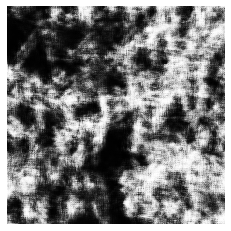

In [11]:
plt.imshow(new_map_2[1],cmap="gray")
plt.axis("off")
# plt.show()
# plt.imshow(new_map[1],cmap="gray")
plt.savefig("output/20201109_451451_2.png",bbox_inches='tight',pad_inches=0,dpi=600)


In [4]:
output=torch.load("output/test_map.pkl")
# torch.save(new_map_2,"output/test_map.pkl")


In [11]:
# plt.imshow(output[1],cmap="gray")
# plt.axis("off")
# plt.show()
# plt.imshow(new_map[1],cmap="gray")
# plt.savefig("output/20201109_451451.png",bbox_inches='tight',pad_inches=0,dpi=600)
cv2.imwrite("output/20201109_451451.png",output[1]*255)
cv2.imwrite("output/20201109_451451_inv.png",(1-output[1])*255)

True

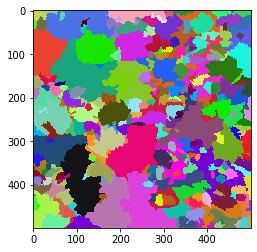

True

In [12]:
sum_map=output
date="20201109"
class_map,id2clus,ma_id=torch.load("data/test/"+date+"/before/cluster.pkl")
class_img=classplot(class_map)[24:475,24:475,:]
ipf=ipfread("data/test/20201109/before/")[24:475,24:475,6:]
cv2.imwrite("output/20201109_class.png",class_img)
cv2.imwrite("output/20201109_ipf_b.png",ipf)
for i in range(3):
    ipf[:,:,i]=np.multiply(1-sum_map[1],ipf[:,:,i])
    class_img[:,:,i]=np.multiply(1-sum_map[1],class_img[:,:,i])
cv2.imwrite("output/20201109_ipf_d.png",ipf)
cv2.imwrite("output/20201109_class_d.png",class_img)

# plt.imshow(1-new_map[0],cmap="gray")
# plt.imshow(ipf[:,:,6:][...,[2,1,0]].astype("int"),alpha=0.5)
# plt.axis('off')
